Task 1

If a matching is stable, it must be a matching to begin with. So, an upper bound for the maximum number of stable matchings is simply the total number of possible matchings, which is n!.  

Task 2

(a)

In [1]:
def IS_STABLE(preference_1, preference_2, matching):
    men = list(matching.keys())
    n = len(men)

    state = 'stable'
    check_count = 0
    while check_count < n:
        opt_pref = preference_1[men[check_count]][0]
        if preference_2[opt_pref][0] == men[check_count] and matching[men[check_count]][0] != opt_pref:
            state = 'unstable'
            break
        else:
            check_count = check_count + 1

    return state

(b)

We used a dictionary for the preference tables and a dictionary for the matching. This is because, since we often need to search for the values for a particular key from the preference table (say the preference order of individual A), it would be more time-efficient than other things such as a list. 

(c) 

Here, the while loop, in the worst case, would run for n times. Within the while loop, we access the preference table (a few times) which a dictionary so the action has time complexity of O(1) (on average, and rarely O(n)). So, we could say that our IS_STABLE algorithm has a time complexity of O(n). 

In [2]:
# A test case

preference_1 = dict()
preference_1['A'] = ['c', 'b', 'd', 'a']
preference_1['B'] = ['b', 'a', 'c', 'd']
preference_1['C'] = ['b', 'd', 'a', 'c']
preference_1['D'] = ['c', 'a', 'd', 'b']

preference_2 = dict()
preference_2['a'] = ['A', 'B', 'D', 'C']
preference_2['b'] = ['C', 'A', 'D', 'B']
preference_2['c'] = ['C', 'B', 'D', 'A']
preference_2['d'] = ['B', 'A', 'C', 'D']

matching = dict()
matching['A'] = ['d']
matching['B'] = ['a']
matching['C'] = ['b']
matching['D'] = ['c']

IS_STABLE(preference_1, preference_2, matching)

'stable'

Task 3

(a)

In [3]:
import itertools

def STABLE_MATCHINGS(preference_1, preference_2): 
    men = list(preference_1.keys())
    women = list(preference_2.keys())
    n = len(men)

    matchings = [] # list of dictionaries. each inner dictionary represents the (female) match for the men, in the same order
    for match in list(itertools.permutations(women)):
        matching = {men[i]: match[i] for i in range(n)}
        if IS_STABLE(preference_1, preference_2, matching) == 'stable':
            matchings.append(matching)

    return(matchings)

In [4]:
#STABLE_MATCHINGS(preference_1, preference_2)

(b) 

The preference tables are assumed to be dictionaries. This is to allow easy use of the IS_STABLE function we built previously. 

(c) 

We are looping over all the possible matchings, which is n!. For each possibility, we run the IS_STABLE function which is O(n), and we also convert the two lists into a dictionary which is O(n) too. So, the time complexity within each loop is O(n). Overall, the time-complexity of this (very bad) algorithm is O(n!n)

Task 4

In [5]:
import random 

def rand_pref_table(list_1, list_2):
    n = len(list_1)
    pref_table = dict()
    return({list_1[i] : sorted(list_2, key=lambda x: random.random()) for i in range(n)})

In [6]:
#rand_pref_table(['A','B', 'C', 'D'], ['a','b','c','d'])

Task 6

In [7]:
import time

is_stab_time = []
stab_mat_time = []

size_list1 = [1000, 2000, 5000]
for size in size_list1:
    lis = [str(i) for i in range(1,size+1)]
    pref_1 = rand_pref_table(lis, lis)
    pref_2 = rand_pref_table(lis, lis)
    lis_shuf = sorted(lis, key=lambda x: random.random()) 
    match = {lis[i]: lis_shuf[i] for i in range(size)}
    
    start = time.perf_counter()
    for iter in range(100):
        IS_STABLE(pref_1, pref_2, match)
    end = time.perf_counter()   
    is_stab_time.append((end - start)/100)


size_list2 = [6, 8, 10]
for size in size_list2:
    lis = [str(i) for i in range(1,size+1)]
    pref_1 = rand_pref_table(lis, lis)
    pref_2 = rand_pref_table(lis, lis)
    lis_shuf = sorted(lis, key=lambda x: random.random()) 
    match = {lis[i]: lis_shuf[i] for i in range(size)}

    start = time.perf_counter()
    STABLE_MATCHINGS(pref_1, pref_2)
    end = time.perf_counter()   
    stab_mat_time.append(end - start)

    

print(is_stab_time)
print(stab_mat_time)



[3.037686983589083e-05, 0.00012994145043194295, 7.514416996855289e-05]
[0.0017751280101947486, 0.11105206102365628, 10.763367708015721]


In [8]:
#!python -m pip install matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

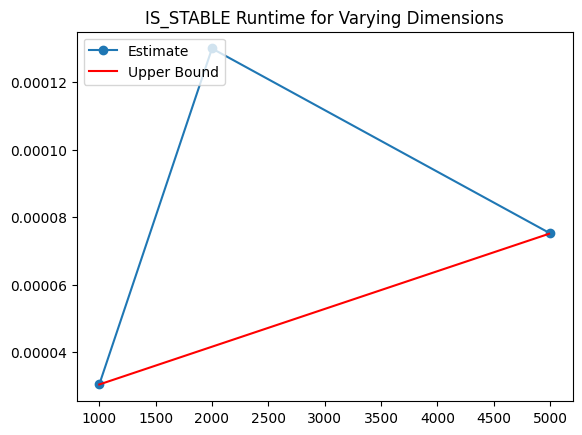

In [9]:
import matplotlib.pyplot as plt
import numpy as np

grad = (is_stab_time[2] - is_stab_time[0]) / (size_list1[2] - size_list1[0])
intercept = is_stab_time[0] - size_list1[0]*grad
dom = np.arange(size_list1[0],size_list1[-1],10)

plt.plot(size_list1, is_stab_time,linestyle='-',marker='o')
plt.plot(dom, dom*grad+intercept, color='red')
plt.title('IS_STABLE Runtime for Varying Dimensions')
plt.legend(['Estimate','Upper Bound'],loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

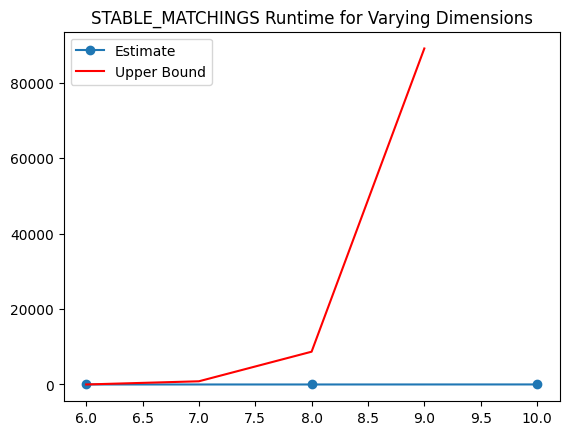

In [10]:
import math 

def mag(n):
    return(n*math.factorial(n))
    
grad = (stab_mat_time[1] - stab_mat_time[0]) / mag(size_list2[1] - size_list2[0])
intercept = stab_mat_time[0] - mag(size_list2[0])*grad
dom = np.arange(size_list2[0],size_list2[-1],1)
ran = [mag(d)*grad + intercept for d in dom]

plt.plot(size_list2, stab_mat_time,linestyle='-',marker='o')
plt.plot(dom, ran, color='red')
plt.title('STABLE_MATCHINGS Runtime for Varying Dimensions')
plt.legend(['Estimate','Upper Bound'],loc='upper left')
plt.show

We do see our the time-complexity upper bounds are indeed upper bounds of our (few) experiment results. For IS_STABLE, the O(n) trend fits the observations well. For STABLE_MATCHINGS, the O(n*n!) trend is certainly a correct upper bound, but it certainly appears to be overlly conservative and a better analysis of the STABLE_MATCHINGS function would hopefully yield a tighter upper bound on the time-complexity. Overall, the experiments are consistent with the expectations. 

Task 7

(a) 

Since we are using a dictionary to store the preference table, adding the imaginary man would mean adding a value, say Omega, to each of the keys, which can be done by assessing the value list and append a value. For example, assuming *Preference_2* is our current preference table of women with four men and four women, and we wish to add a undesirable imaginary man 'Omega' to the end of each woman's preference order. This can be done as follows: 

    women = list(Preference_2.keys())
    for woman in women:
        Preference_2[woman].append('Omega')

(b) 

In [11]:
def FUND_ALG(preference_1, preference_2):
    men = list(preference_1.keys())
    women = list(preference_2.keys())
    n = len(men)
    
    match = {woman: 'Omega' for woman in women}
    
    for woman in women:
        preference_2[woman].append('Omega')
    
    k = 0 
    while k < n:
        X = men[k]
        while X != 'Omega':
            x = preference_1[X][0]
            x_match = match[x]
            if preference_2[x].index(X) < preference_2[x].index(x_match):
                match[x] = X
                X = x_match
            if X != 'Omega':
                preference_1[X].pop(0)
        k = k + 1

    return(match) # match is a dictionary with key:value pair being woman:man.

(c) 

The inputs are two preference tables, and they are dictionaries. Inside this algorithm, we loop n times. Within each loop, we do another loop to check if X is the undesirable man, which is of order n too in the worst case. Within that loop, we assess values of the dictionary using keys (O(1)), and we find elements in a list(O(n)), and we sometimes remove elements from list too (O(n)). Therefore, this algorithm is of worst-case time-complexity O(n^3). 

Task 8

In [12]:
import pandas as pd

H_preference_table = pd.DataFrame({"Anatole" : ["cunegonde","brigitte","donatienne","antoinette"],
                                   "Barnabe" : ["brigitte","antoinette","cunegonde","donatienne"],
                                   "Camille" : ["brigitte","donatienne","antoinette","cunegonde"],
                                   "Dominique" : ["cunegonde","antoinette","donatienne","brigitte"]                              
                                })

F_preference_table = pd.DataFrame({"antoinette" : ["Anatole","Barnabe","Dominique","Camille"],
                                   "brigitte" : ["Camille","Anatole","Dominique","Barnabe"],
                                   "cunegonde" : ["Camille","Barnabe","Dominique","Anatole"],
                                   "donatienne" : ["Barnabe","Anatole","Camille","Dominique"]                              
                                })

matching_df = pd.DataFrame({"Men" : ["Anatole","Barnabe","Camille","Dominique"],
                         "Women" : ["donatienne","antoinette","brigitte","cunegonde"]                          
                                })

In [13]:
def FUND_ALG_DF(preference_1, preference_2):
    preference_1 = preference_1.to_dict('list')
    preference_2 = preference_2.to_dict('list')
    men = list(preference_1.keys())
    women = list(preference_2.keys())
    n = len(men)
    
    match = {woman: 'Omega' for woman in women}
    
    for woman in women:
        preference_2[woman].append('Omega')
    
    k = 0 
    while k < n:
        X = men[k]
        while X != 'Omega':
            x = preference_1[X][0]
            x_match = match[x]
            if preference_2[x].index(X) < preference_2[x].index(x_match):
                match[x] = X
                X = x_match
            if X != 'Omega':
                preference_1[X].pop(0)
        k = k + 1

    output = pd.DataFrame({"Men": list(match.values()), "Women": list(match.keys())})
    return(output) 

Task 9

The algorithm built in Task 4 allows us to generate preference tables from two lists. This could be used to help us construct preference tables of varying sizes and with entries of varying data types, which can then be used to see if our algorithms are capable of handling and processing a wide range of potential preference tables. Among the 5Rs, this would certainly help with Re-runnability as it checks the codes for many potential scenarios, and it could help the Reusability of the code for the same reason. 

We could also check the Repeatability of the codes by running the function for multiple times using the same inputs and see if the results are identical each time. The following chunk of codes test the IS_STABLE function using some particular fixed input and is executed for 100 times. A check is then implemented to see if the same output is generated each time. 

In [14]:
def repeatable_test(FUNC, PARAM1, PARAM2, PARAM3, iter):
    result = []
    for i in range(iter):
        result.append(FUNC(PARAM1,PARAM2, PARAM3))
    if len(set(result)) == 1 and iter > 1:
        return('PASS')
    else:
        return('FAIL')

In [15]:
repeatable_test(IS_STABLE, preference_1, preference_2, matching,100)

'PASS'

One remark on the above function: the arguments needed for the test include all the parameters of the function of interest separately. An attempt was made to simply do FUNC(PARAM), but that did not work immediately. It could be achieved, however, by changing the original function arguments to *arg, which allows a tuple of any length as input. This would change too much of the existing codes so it was not done, and a more naive version of the repeatability test is written instead. 